In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [3]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]

    plt.scatter(A[positive_indices, 0], A[positive_indices, 1], marker='x', c= 'purple' if test else 'green')
    plt.scatter(A[negative_indices, 0], A[negative_indices, 1], marker='+', c= 'blue' if test else 'red')

In [4]:
def decision_boundary(X, y, theta, mean, std):
    grid_x = np.array([X[:, 0].min()-5,  X[:, 1].max()+5])
    grid_y = mean + (-std / (theta[2])) * (theta[1] * ((grid_x - mean) / std) + theta[0])

    plt.plot(grid_x, grid_y)

In [5]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X_new = (X - mean) / std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [7]:
def sigmoid(z):
    """
    Sigmoid function
    :param z: array or matrix of values
    :return: sigmoid values
    """
    return 1 / (1 + np.exp(-z))

In [8]:
def h(X, theta):
    # X - матриця
    # theta - вектор
    z = np.dot(X, theta)
    return sigmoid(z)

In [9]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    
    h0 = h(X, theta)
    J = (1 / m) * ((-y.T).dot(np.log(h0)) - (1 - y).T.dot(np.log(1 - h0)))
    
    return J

# cost_function(X_new, y_new, theta)

In [10]:
def derivative_theta(X, y, theta):
    m = X.shape[0]

    if m == 0:
        return None

    h0 = h(X, theta)
    d_theta = (1 / m) * X.T.dot((h0 - y));
    return d_theta

In [11]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = None
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        delta = derivative_theta(X, y, theta)
        theta = theta - alpha * delta
        J = cost_function(X, y, theta)

        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        # if abs(J-J_history[-2]) < epsilon:
        #     break
            
    return theta, J_history

In [12]:
def predict(X, mean, std, theta, normilize=False):
    if normilize:
        bc_arr, bc_row_means = np.broadcast_arrays(T, mean)
        bc_arr, bc_row_stds = np.broadcast_arrays(T, std)
        
        X_norm = (X - bc_row_means) / bc_row_stds
        X_proc = prepare_X(X_norm)
        y_pred = h(X_proc, theta)
    else:
        X_proc = prepare_X(X)
        y_pred = h(X_proc, theta)
    y = [1 if (x >= 0.5) else 0 for x in y_pred]
    return y

In [13]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


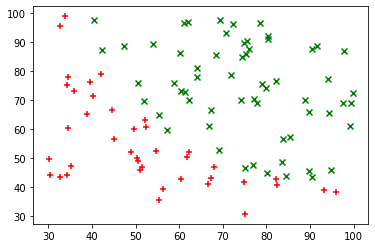

In [14]:
plot_data(np.array(X), np.array(y))

In [15]:
X_new, mean, std = normalize(X)
X_new = prepare_X(X_new)
y_new = np.array(y).reshape((X.shape[0], 1))

In [16]:
theta = np.zeros((X_new.shape[1], 1))

In [17]:
cost_function(X_new, y_new, theta)

array([[0.69314718]])

In [18]:
new_theta, Js = gradient_descent(X_new, y_new, theta, 0.001, 1e-7, 10000, False)
# print(new_theta, len(Js))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


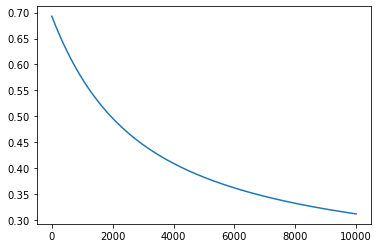

In [19]:
plt.plot(Js)

In [20]:
cost_function(X_new, y_new, new_theta)

array([[0.31185809]])

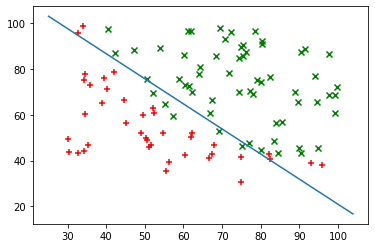

[[0.46725478]
 [1.285726  ]
 [1.15288545]]


In [21]:
X_np = np.array(X)
y_np = np.array(y)

decision_boundary(X_np, y_np, new_theta, mean, std)
plot_data(np.array(X), y_new)

plt.show()
print(new_theta)

In [22]:
X

,exam1,exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [23]:
T = np.array([[40, 40], [60, 65], [100, 100], [0, 0], [15, 50], [60, 10], [30, 25], [70, 55], [80, 69]])
predictions = np.array(predict(T, mean, std, new_theta, normilize=True))
print(predictions)

[0 1 1 0 0 0 0 1 1]


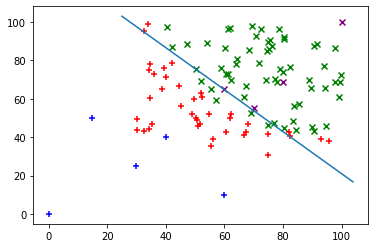

In [24]:
decision_boundary(X_np, y_np, new_theta, mean, std)
plot_data(T, predictions, test=True)
plot_data(X_np, y_np)
plt.show()